In [11]:
from pantree.panTree import panTree
from pantree.recipe import recipeBank
from pantree.domains.ba import bonAppetit
from pantree.domains.epi import epicurious
from pantree.domains.nyt import NYT
from pantree.domains.srs_eats import srsEats
from pantree.domains.food_network import foodNetwork
from pantree.domains.all_recipes import allRecipes
from pantree.recipe import recipeDB

In [4]:
# r = recipeDB('./data/recipeDB.db')
# r.create_table()

In [14]:
d = NYT('./data/recipeDB.db')
# d.get_links_to_recipes_from_homepage(depth = 8)

In [15]:
d.db.get_ingredients()
d.db.serialize('./data/bank')

In [16]:
p = panTree(['flour'], pickled_recipeBank = './data/bank')
p.process()
p.rank

['https://cooking.nytimes.com/recipes/1023312-kimchi-cheddar-biscuits',
 'https://cooking.nytimes.com/recipes/1019379-fresh-strawberry-pie',
 'https://cooking.nytimes.com/recipes/1023304-apricot-snack-cake',
 'https://cooking.nytimes.com/recipes/1023294-fried-okra-with-remoulade?module=Recipe+of+The+Day&pgType=homepage&action=click']

/var/folders/c3/9y335k5s08sdzh29h22cmxhm0000gn/T/ipykernel_74784/1662418229.py:5: RuntimeWarning: invalid value encountered in true_divide
  plt.imshow(np.array(p.bank.data.tocsc().T*p.bank.data.tocsc().todense())/\


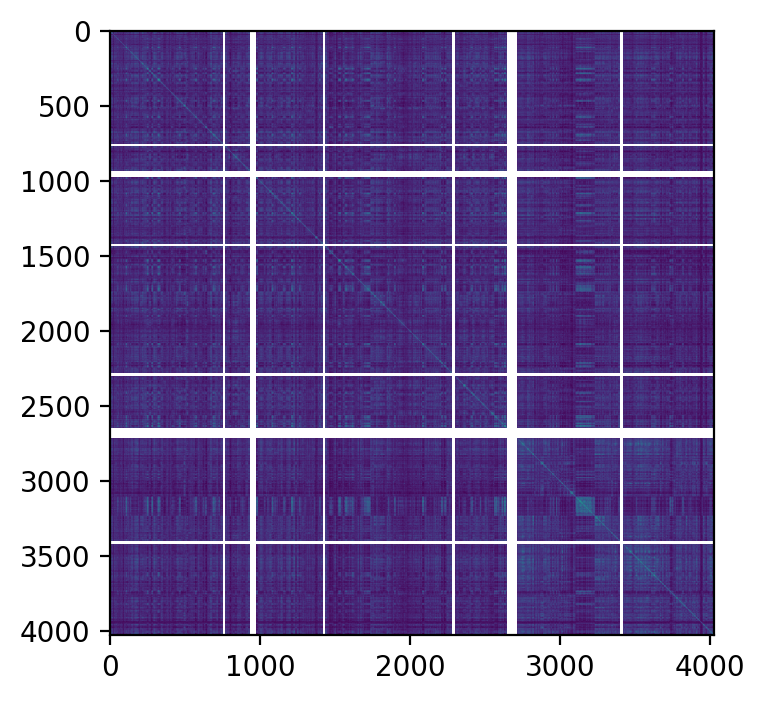

In [43]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.sparse
plt.figure(dpi=200)
plt.imshow(np.array(p.bank.data.tocsc().T*p.bank.data.tocsc().todense())/\
           (np.matrix(scipy.sparse.linalg.norm(p.bank.data,axis=0)).T*np.matrix(scipy.sparse.linalg.norm(p.bank.data,axis=0))))